___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [1178]:
df = pd.read_csv('heart.csv')

In [1179]:
df0 = df.copy()

# EDA

In [1180]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [1183]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1184]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [1185]:
index = df[df['restecg']== 2].index
df.drop(index=index,inplace=True)

In [1186]:
df['thal'].value_counts()

2    164
3    116
1     17
0      2
Name: thal, dtype: int64

In [1187]:
index = df[df['thal']== 0].index
df.drop(index=index,inplace=True)

In [1188]:
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
293,299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
294,300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
295,301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [1189]:
df.drop_duplicates(inplace=True)

In [1190]:
categorical_col = []
numeric_col = []
for column in df.columns:
    if df[column].nunique() <= 10:
        categorical_col.append(column)
    else:
        numeric_col.append(column)

In [1191]:
categorical_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [1192]:
df.target.value_counts()

1    162
0    134
Name: target, dtype: int64

In [1193]:
pd.crosstab(df['target'],df['target'], normalize='all')*100

target,0,1
target,,
0,45.270,0.000
1,0.000,54.730


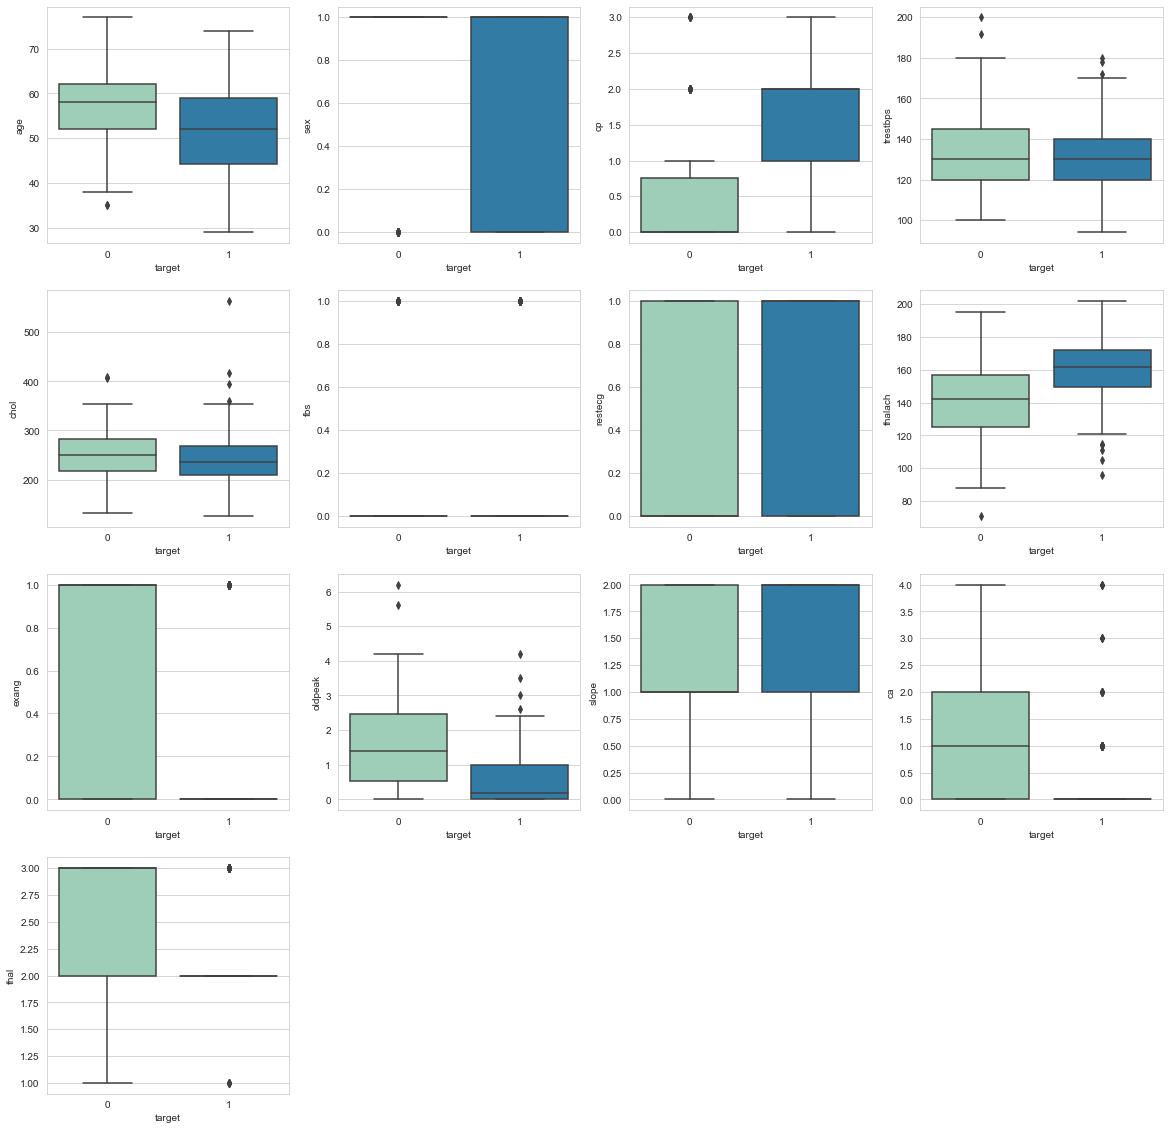

In [1194]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature, data=df, palette="YlGnBu")

(14.5, -0.5)

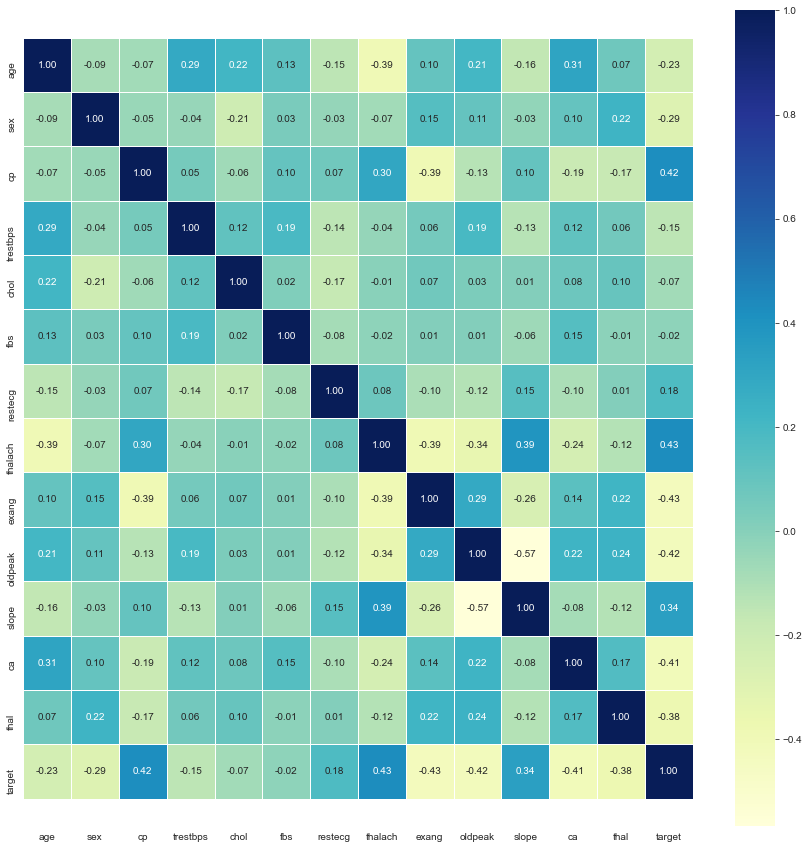

In [1195]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

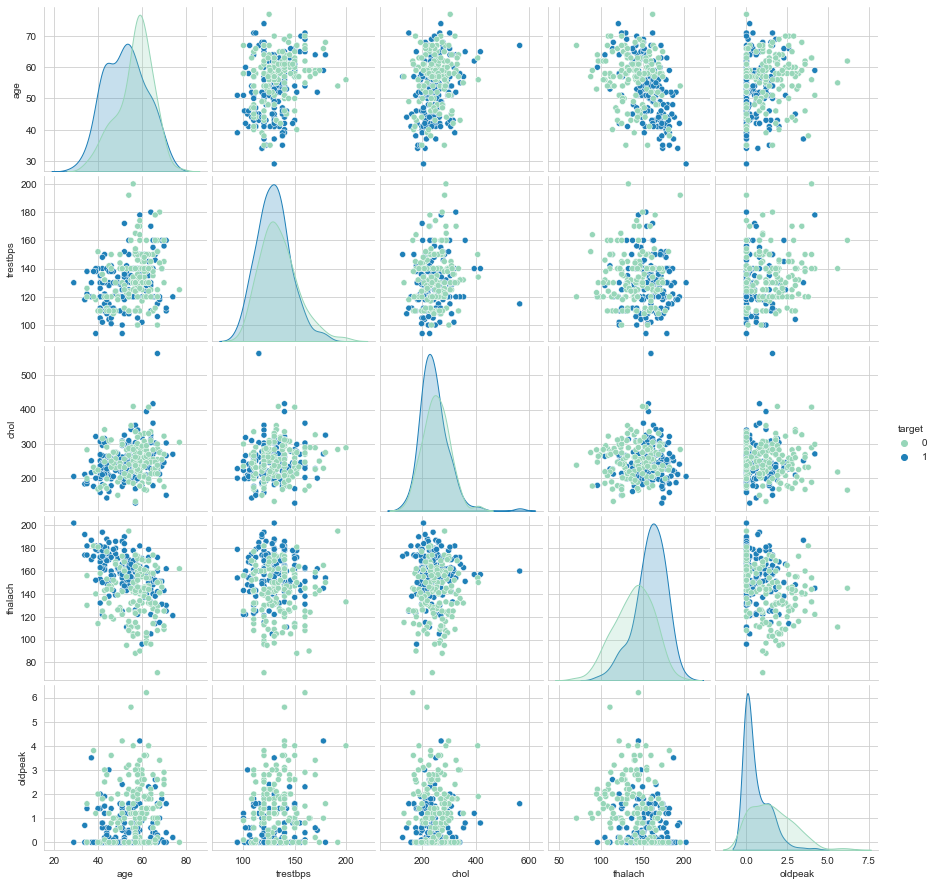

In [1196]:
sns.pairplot(data = df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']], hue='target',palette="YlGnBu");

In [1197]:
categorical_col.remove('target')
df = pd.get_dummies(df, columns = categorical_col)

In [1198]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,37,130,250,187,3.500,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,1,1,0,0,1,...,0,1,1,0,0,0,0,0,1,0
3,56,120,236,178,0.800,1,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
4,57,120,354,163,0.600,1,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
300,68,144,193,141,3.400,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
301,57,130,131,115,1.200,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


# Data Preprocessing

In [1199]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [1200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [1201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [1202]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

1    113
0     94
Name: target, dtype: int64

1    49
0    40
Name: target, dtype: int64


In [1203]:
scaler = MinMaxScaler()

In [1204]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [1205]:
from sklearn.linear_model import LogisticRegression

In [1206]:
log_model=LogisticRegression()

In [1207]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [1208]:
y_pred=log_model.predict(X_test_scaled)

In [1209]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [1210]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target,pred,pred_proba
75,55,135,250,161,1.400,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0.898
28,65,140,417,157,0.800,1,0,0,0,1,...,1,0,0,0,0,1,0,1,1,0.901
12,49,130,266,171,0.600,0,1,0,1,0,...,0,0,0,0,0,1,0,1,1,0.929
302,57,130,236,174,0.000,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0.734
108,50,120,244,162,1.100,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0.969
282,59,126,218,134,2.200,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0.456
27,51,110,175,123,0.600,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0.934
297,59,164,176,90,1.000,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0.047
252,62,138,294,106,1.900,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0.276
90,48,124,255,175,0.000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0.705


In [1211]:
from sklearn.metrics import confusion_matrix, classification_report

In [1212]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [1213]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[34  6]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.87      0.84      0.85        49

    accuracy                           0.84        89
   macro avg       0.84      0.84      0.84        89
weighted avg       0.84      0.84      0.84        89


Train_Set
[[ 75  19]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        94
           1       0.85      0.93      0.89       113

    accuracy                           0.87       207
   macro avg       0.88      0.86      0.87       207
weighted avg       0.87      0.87      0.87       207



In [1214]:
from sklearn.model_selection import cross_validate

In [1215]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores_log = pd.DataFrame(scores, index = range(1, 11))
df_scores_log

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.016,0.000,0.733,0.917,0.815,0.762
2,0.008,0.008,0.800,1.000,0.889,0.857
3,0.008,0.000,0.846,0.917,0.880,0.857
4,0.008,0.000,0.846,1.000,0.917,0.905
5,0.008,0.008,0.909,0.909,0.909,0.905
6,0.000,0.008,0.818,0.818,0.818,0.810
7,0.000,0.008,0.727,0.727,0.727,0.714
8,0.000,0.000,0.917,1.000,0.957,0.950
9,0.008,0.000,0.900,0.818,0.857,0.850
10,0.008,0.000,0.909,0.909,0.909,0.900


In [1216]:
df_log = df_scores_log.mean()[2:]

In [1217]:
# degerler arasinda bbüyük farklilik yok

In [1218]:
from sklearn.model_selection import GridSearchCV

In [1219]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = [ 0.1, 1, 2, 3]
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

In [1220]:
log_model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy")

In [1221]:
log_model_grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=10)

In [1222]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 2, 3],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [1223]:
log_model_grid.best_params_

{'C': 2, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [1224]:
log_model_grid.best_score_

0.8557142857142856

In [1225]:
eval_metric(log_model_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  5]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.89      0.82      0.85        49

    accuracy                           0.84        89
   macro avg       0.84      0.85      0.84        89
weighted avg       0.85      0.84      0.84        89


Train_Set
[[83 11]
 [20 93]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.89      0.82      0.86       113

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



In [1226]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

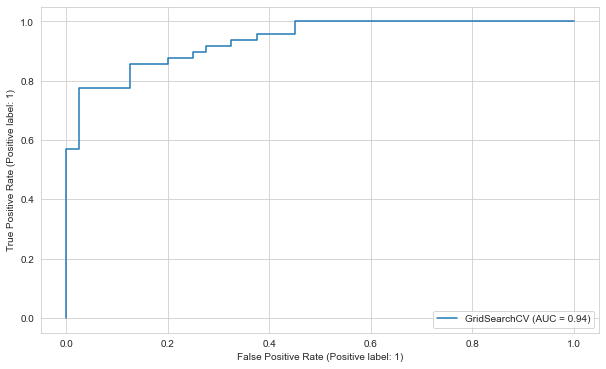

In [1227]:
plot_roc_curve(log_model_grid, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [1228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1229]:
from sklearn.neighbors import KNeighborsClassifier

In [1230]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [1231]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [1232]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0], dtype=int64)

In [1233]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [1234]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.400,0.600
1,1.000,0.000
2,0.200,0.800
3,0.200,0.800
4,0.800,0.200
...,...,...
84,0.200,0.800
85,0.400,0.600
86,0.800,0.200
87,0.800,0.200


In [1235]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target,pred,pred_proba
52,62,130,231,146,1.800,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0.200
264,54,110,206,108,0.000,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0.000
273,58,100,234,156,0.100,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0.400
131,49,134,271,162,0.000,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,1.000
302,57,130,236,174,0.000,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1.000
282,59,126,218,134,2.200,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0.200
108,50,120,244,162,1.100,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,1.000
34,51,125,213,125,1.400,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0.200
292,58,170,225,146,2.800,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0.000
186,60,130,253,144,1.400,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0.200


In [1236]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [1237]:
confusion_matrix(y_test, y_pred)

array([[35,  5],
       [ 4, 45]], dtype=int64)

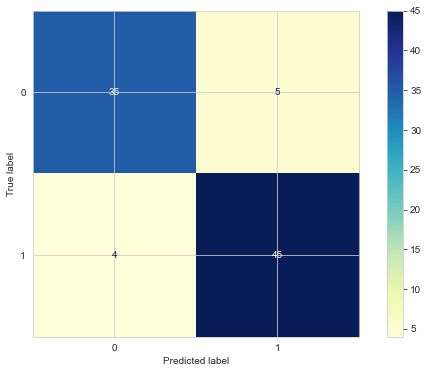

In [1238]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test,cmap="YlGnBu");

In [1239]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  5]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.90      0.92      0.91        49

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89



In [1240]:
y_train_pred = knn_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[ 79  15]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        94
           1       0.87      0.91      0.89       113

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



### elbow

In [1241]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [1242]:
test_error_rates = []


for k in range(1,30): 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test) 
    
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

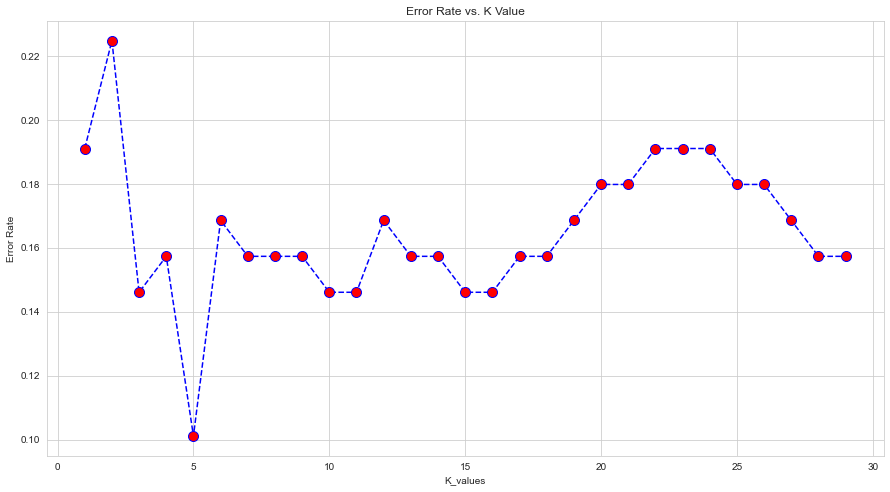

In [1243]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [1244]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

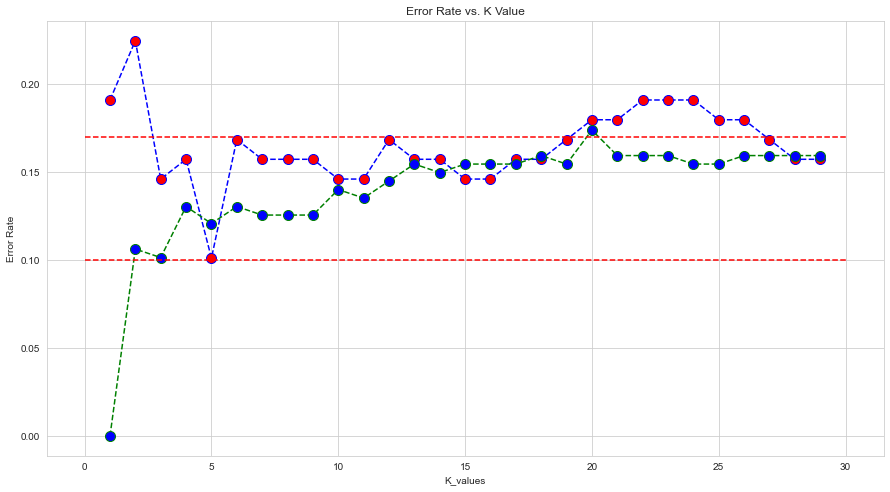

In [1245]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.10, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.17, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [1246]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_score.append(1-accuracy_score(y_train, model.predict(X_train_scaled)))
    test_score.append(1-accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 17.39%


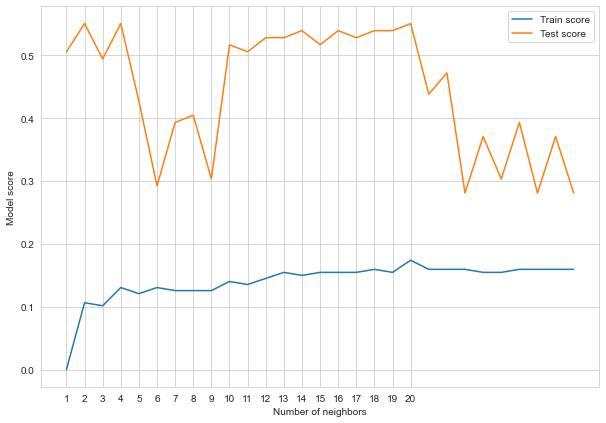

In [1247]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [1248]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [1249]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')  
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[31  9]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.82      0.84      0.83        49

    accuracy                           0.81        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.81      0.81      0.81        89


Train_Set

[[ 94   0]
 [  0 113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       113

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



In [1250]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set

[[35  5]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.90      0.92      0.91        49

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89


Train_Set

[[ 79  15]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        94
           1       0.87      0.91      0.89       113

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



In [1251]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[32  8]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.84      0.88      0.86        49

    accuracy                           0.84        89
   macro avg       0.84      0.84      0.84        89
weighted avg       0.84      0.84      0.84        89


Train_Set

[[ 76  18]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        94
           1       0.85      0.93      0.89       113

    accuracy                           0.87       207
   macro avg       0.88      0.87      0.87       207
weighted avg       0.88      0.87      0.87       207



In [1252]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n') 
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[33  7]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.86      0.88      0.87        49

    accuracy                           0.85        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.85      0.85      0.85        89


Train_Set

[[ 77  17]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        94
           1       0.86      0.90      0.88       113

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



In [1253]:
from sklearn.model_selection import cross_val_score, cross_validate

In [1254]:
model = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000,0.008,0.762,0.733,0.917,0.815
2,0.000,0.008,0.857,0.800,1.000,0.889
3,0.000,0.000,0.762,0.769,0.833,0.800
4,0.008,0.000,0.952,0.917,1.000,0.957
5,0.000,0.008,0.905,1.000,0.818,0.900
6,0.000,0.000,0.857,0.833,0.909,0.870
7,0.000,0.008,0.810,0.769,0.909,0.833
8,0.000,0.000,0.950,0.917,1.000,0.957
9,0.000,0.008,0.950,1.000,0.909,0.952
10,0.000,0.000,0.750,0.800,0.727,0.762


In [1255]:
df_knn = df_scores.mean()[2:]

# Visually compare models based on your chosen metric

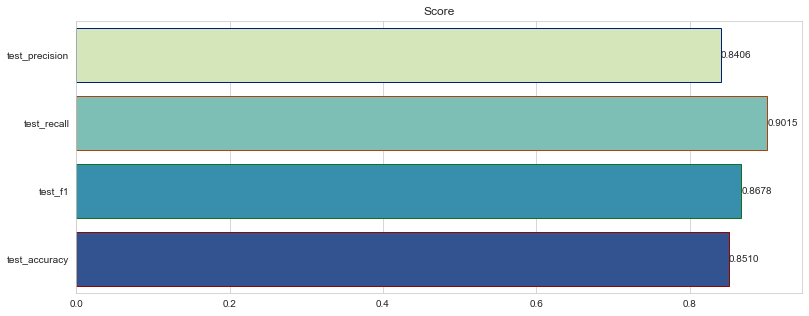

In [1281]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_log, y=df_log.index, palette="YlGnBu",edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')


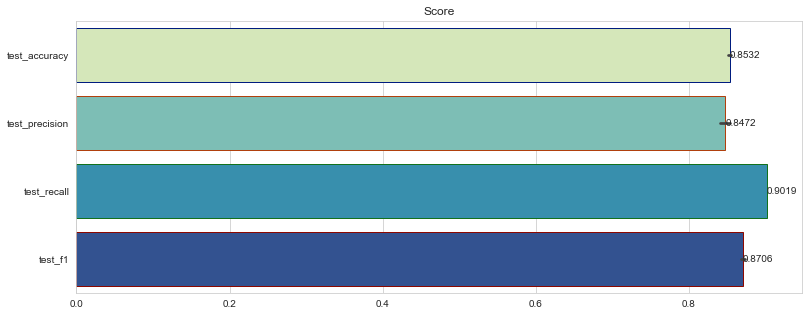

In [1259]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_knn, y=df_knn.index, palette="YlGnBu",edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')


# Chose best model and make a random prediction 

In [1260]:
scaler = MinMaxScaler().fit(X)

In [1261]:
import pickle
pickle.dump(scaler, open("scaler_hearts", 'wb'))

In [1262]:
X_scaled = scaler.transform(X)

In [1263]:
final_model = KNeighborsClassifier(n_neighbors=5)

In [1272]:
final_model.fit(X,y)

KNeighborsClassifier()

In [1273]:
pickle.dump(final_model, open("final_model_hearts", 'wb'))
df.loc[56,:]

age          48.000
trestbps    122.000
chol        222.000
thalach     186.000
oldpeak       0.000
target        1.000
sex_0         0.000
sex_1         1.000
cp_0          1.000
cp_1          0.000
cp_2          0.000
cp_3          0.000
fbs_0         1.000
fbs_1         0.000
restecg_0     1.000
restecg_1     0.000
exang_0       1.000
exang_1       0.000
slope_0       0.000
slope_1       0.000
slope_2       1.000
ca_0          1.000
ca_1          0.000
ca_2          0.000
ca_3          0.000
ca_4          0.000
thal_1        0.000
thal_2        1.000
thal_3        0.000
Name: 56, dtype: float64

In [1274]:
new_obs = {'age': 48,
'trestbps':122,
'chol':222,
'thalach':196,
'oldpeak':0,
'sex_0'    :  0,
'sex_1'    :  1,
'cp_0'     :  1,
'cp_1'     :  0,
'cp_2'     :  0,
'cp_3'     :  0,
'fbs_0'    :  1,
'fbs_1'    :  0,
'restecg_0':  1,
'restecg_1':  0,
'exang_0'  :  1,
'exang_1'  :  0,
'slope_0'  :  0,
'slope_1'  :  0,
'slope_2'  :  1,
'ca_0'     :  1,
'ca_1'     :  0,
'ca_2'     :  0,
'ca_3'     :  0,
'ca_4'     :  0,
'thal_1'   :  0,
'thal_2'   :  1,
'thal_3'   :  0
          }
samples = pd.DataFrame(data=new_obs,index=[0])
samples


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,48,122,222,196,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [1275]:
scaler_hearts = pickle.load(open("scaler_hearts", "rb"))

In [1276]:
sample_scaled = scaler_hearts.transform(samples)
sample_scaled

array([[0.39583333, 0.26415094, 0.21917808, 0.95419847, 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [1277]:
final_model = pickle.load(open("final_model_hearts", "rb"))

In [1278]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)


In [1280]:
predictions = final_model.predict(samples)
predictions

array([1], dtype=int64)